# Welcome to your Machine Learning Jupyter Notebook. #

This'll be the cheat sheet for how each of the scikit_learn classes essentially handle the data. This was all collected from the Codecademy Machine Learning Fundamentals course (c. 2018).

In [77]:
# Some base things we want to have imported by default:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supervised Learning Methods

Supervised Learning techniques rely on prior knowledge of how your data regress/classify. You use this "known" dataset to establish a model to predict future, "unknown" data.

## Linear Regression ##

Linear regression is a supervised learning paradigm that attempts to fit a line of best fit to the data that can have predictive value for future data.
Points have known y values for each X value in the training data set.

Linear regression fit is all about determining how far each point is (in the y axis) from a predicted fit line. The distances (squared euclidean distance) are averaged. This generates a Mean Squared Error (MSE) for the line. The slope and intercept are adjusted (using gradient descent) some finite number of times until MSE is minimized.

Linear Regression is ideally used on continuous data that follows a general correlative trend (independent variable generates some dependent outcome).
Of course the independent variables can be numerous, as linear regression doesn't have to be performed on 2D data. The dependent variable, however, can only be 1 thing, as it's the output of all other features.
For the purposes of this example, we'll use 2D data to keep things simple, but the LinearRegression class in sklearn can absolutely take in multiple features.

The brute force approach is shown first, followed by the scikit-learn version.

In [3]:
# Remember that the equation for any line is y = m*x + b. m and b are the unknowns and are originally set to 0 (or
# some other staring values, like in this brute force case)
# Loss for the guessed line is assessed as MSE:

# Example dataset:

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# y = 10x + 30
m = 10
b = 30

def calculate_loss(x, y, m, b):
    
    y_predicted = [i * m + b for i in x]
    total_loss = 0
    
    for j in range(len(y)):
        # Euclidean distance:
        total_loss += (y[j] - y_predicted[j])**2

    return(total_loss/len(y))

print('This is the loss value we hope to minimize over several iterations: ')
print(calculate_loss(months, revenue, m, b))

This is the loss value we hope to minimize over several iterations: 
568


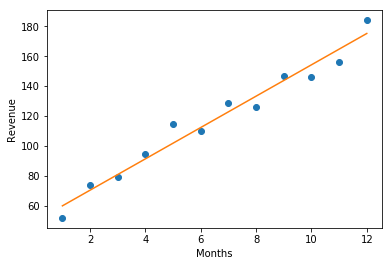

The final slope came out to: 10.4634277324
The final intercept came out to: 49.6021535134


In [6]:
# m and b are adjusted via gradient descent to minimize loss. Think of this process as descending a parabola using
# the slope of the derivative at each point along the parabola as an indicator of which direction to go.

# These functions employs the derivative of the parabolic MSE curve to determine which direction 
# to move for the adjustment:

def get_gradient_at_b(x, y, b, m):
    
    diff = 0
    N = len(x)
    
    for i in range(N):
        y_val = y[i]
        x_val = x[i]
        diff += (y_val - ((m * x_val) + b))
    
    # This equation is given (ie, I don't know where exactly it comes from):
    b_gradient = -(2.0/N) * diff
    
    return(b_gradient)

def get_gradient_at_m(x, y, b, m):
    
    N = len(x)
    diff = 0
    
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    
    # Likewise, this is given:
    m_gradient = -(2.0/N) * diff
    
    return(m_gradient)

# Here, we adjust the slope and intercept by some amount (adjusted by the learning rate). The learning rate
# adjustment makes us to take a smaller step each time, so we don't overshoot the lowest part of the parabola
# and inadvertently bounce back and forth across it infintely:

def step_gradient(x, y, b_current, m_current, learning_rate):
    
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)  
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    
    return(b, m)

# Here we run the gradient adjustment and descent for a number of finite iterations, hopefully minimizing error:

def gradient_descent(x, y, learning_rate, num_iterations):
    
    b = 0
    m = 0
    
    for i in range(num_iterations):
        b, m = step_gradient(x, y, b, m, learning_rate)
    
    return(b, m)

b, m = gradient_descent(months, revenue, 0.01, 1000) # Remember months and revenue are defined above
y_predicted = [m * x + b for x in months]

# Now we plot them to check them against each other:

plt.plot(months, revenue, "o")
plt.plot(months, y_predicted)
plt.xlabel('Months')
plt.ylabel('Revenue')

plt.show()

print('The final slope came out to: ' + str(m) + '\nThe final intercept came out to: ' + str(b))

# Awesome!

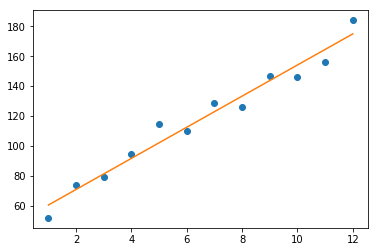

The final slope came out to: [[10.38811189]]
The final intercept came out to: [50.22727273]


In [34]:
# Here's the scikit.learn version:

import numpy as np
from sklearn.linear_model import LinearRegression

# Just a quick reshape to make the data ready for sklearn:

revenue = np.array(revenue)
months = np.array(months)
revenue = revenue.reshape(-1, 1)
months = months.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(months, revenue)
prediction = linear_model.predict(months)

# And now we plot to check the prediction:

plt.plot(months, revenue, "o")
plt.plot(months, prediction)
plt.xlabel('Months')
plt.ylabel('Revenue')

plt.show()

print('The final slope came out to: ' + str(linear_model.coef_) + 
      '\nThe final intercept came out to: ' + str(linear_model.intercept_))

# Super dope!

## For classifiers: Accuracy, Precision, Recall, and F1
One of the most important ways of telling whether your classifiers are doing a good job is to measure accuracy, precision, and recall.
These essentially tell us how well your classifier predicted class A when class A was supposed to be predicted and never else.

Note:

TP = True Positive, 
TN = True Negative, 
FP = False Positive, 
FN = False Negative

### Accuracy
Accuracy can be thought of as being the proportion of times your classifier correctly classified a sample. The equation is as follows:
##### Accuracy = (TP + TN) / (TP + FP + TN + FN)
This alone doesn't give you a sense of what the FP rate is relative to this. It's possible that in order to classify TP correctly, you have to be a little to generous, and you have a high FP rate because of it.

### Precision
Precision starts getting more specific. Precision says, of all the times your classifier predicted a positive, how often was it right? The equation looks like this:
##### Precision = TP / (TP + FP)
This still isn't enough to get a sense of whether your classifier is doing a good job, though, because it's possible your classifier is too conservative, and almost never predicts a positive unless it's at an absolute extreme. You may have a very high FN rate here you that don't see

### Recall
Recall breaks this problem down a little bit more. Recall asks: of all the positives in the dataset, how many did the classifier actually get? The equation looks like this:
###### Recall = TP / (TP + FN)
This is getting better, but it's still better to look at a combination of all of these things. Which is where the F1 score comes in.

### F1 Score
The F1 Score combines precision and recall to give a single value that describes how well your classifier classifies.
The equation looks like this:
##### F1 = (2 x Precision x Recall) / (Precision + Recall)
I won't pretend to know why this is the equation for this. Suffice it to say that this the standard for reporting how good your classifier is.

## Naive Bayes Classifier ##
Naive Bayes employs Bayes Theorem:
##### P(A | B) = (P(B | A) * P(A)) / P(B) 
The probability of something being of class A given that it has features B is equal to the probability that a class A contains features B times the probability of something being class A at all, all divided by the probability of anything containing features B.
The denominator probability can actually be ignored in the case of this calculation because when we compare classes, it divides itself out

The probability of anything being class A (P(A)) is simple, as it's the proportion of known samples that are class A.
The real trick is getting the probability that a thing of class A will contain features B (P(B|A)). This is actually going to end up being the cumulative probability that any features (usually words) are going to show up in a particular class. For this, we generate dictionaries that give us a sense of how many times a word or feature showed up in each class.
For this, we want to make sure to clean up our data as much as possible and get rid of punctuation and cases. I won't spend too much time doing that here, though.

First, I'll show the brute force approach, then the sklearn version.

In [96]:
# I'll import some twitter data that was provided by Codecademy here.
# We'll try to generate a model that can predict whether a tweet came from New York or Paris based on the words
# it contains

from collections import Counter

# This function will return the number of times that each word appeared in all the tweets:

def count_words(word_array):
    
    all_words = []
    
    for tweet in word_array:
        all_words += tweet
    c = Counter(all_words)
    
    return(c)

# Import some example data:

new_york_data = pd.read_json('new_york.json', lines=True)
paris_data = pd.read_json('paris.json', lines=True)

new_york_data = new_york_data.dropna(axis=0, subset=['text'])
paris_data = paris_data.dropna(axis=0, subset=['text'])

new_york_data['words'] = [tweet.lower().split(' ') for tweet in new_york_data['text']]
paris_data['words'] = [tweet.lower().split(' ') for tweet in paris_data['text']]

# Here we calculate the probabilities of any tweet being NY or Paris (P(A)):

total_tweets = len(new_york_data) + len(paris_data)
percent_new_york = float(len(new_york_data)) / total_tweets
percent_paris = float(len(paris_data)) / total_tweets

# Here we generate a counter object to count how many times each word appears in all the city's tweets
    
new_york_counter = count_words(new_york_data['words'])
paris_counter = count_words(paris_data['words'])

# Here we calculate the probability that a set of words from a tweet came from New York or Paris given
# the probabilities of words appearing in New York and Paris tweets (P(B|A)):

new_tweet = 'Je ne sais quoi'.split()
n_new_york_words = sum(new_york_counter.values())
n_paris_words = sum(paris_counter.values())

new_york_probability = 1.0
paris_probability = 1.0

for word in new_tweet:
    word_in_new_york = float(new_york_counter[word])
    word_in_paris = float(paris_counter[word])
    
    # To get a cumulative prob, you multiply the probabilities together. To avoid a zero word count throwing a wrench
    # into your probability, we "smooth" by adding a 1.0 to all counts values and the size of the counter dict to the
    # denominator:
    
    new_york_probability *= (word_in_new_york + 1.0) / (n_new_york_words + len(new_york_counter))
    paris_probability *= (word_in_paris + 1.0) / (n_paris_words + len(paris_counter))
    
print('The probability that the tweet came from New York: ' + str(new_york_probability))
print('The probability that the tweet came from Paris: ' + str(paris_probability))

if new_york_probability > paris_probability:
    print('The tweet is likely from New York')
else:
    print('The tweet is likely from Paris')
    
# Baller!

The probability that the tweet came from New York: 3.24408622655e-19
The probability that the tweet came from Paris: 1.1066626486e-14
The tweet is likely from Paris


In [105]:
# Here we'll use sklearn's built in Naive Bayes class:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

new_tweet = 'Je ne sais quoi'
counter = CountVectorizer()
counter.fit(list(new_york_data['text']) + list(paris_data['text']))

tweet_counts = counter.transform([new_tweet])
training_counts = counter.transform(list(new_york_data['text']) + list(paris_data['text']))

classifier = MultinomialNB()

# Here we specify that a zero label is for New York data and a 1 label is for Paris data

training_labels = [0]*len(new_york_data) + [1]*len(paris_data)

classifier.fit(training_counts, training_labels)

# Here we get the probabilities that our tweet belonged to each category:

print(classifier.predict_proba(tweet_counts))

# Here we get a 0 or 1 depending on the final classification for our tweet:

print(classifier.predict(tweet_counts))
if classifier.predict(tweet_counts) == 0:
    print('The tweet is likely from New York')
else:
    print('The tweet is likely from Paris')

# Hooray!

[[1.08344499e-05 9.99989166e-01]]
[1]
The tweet is likely from Paris


## K Nearest Neighbors ##

This one is pretty cool. This is another classification model. It essentially relies on the idea that points in an Nth-dimensional space that fall closest to your point of interest will most likely predict the class for that point.
The K refers to how many neighbors' classes you want to assess to make your classification.

To perform this prediction, you plot your point in the space. For this, it's important that your features are normalized (Min/Max normalization works well for this). You calculate the distance of your known points to your point of interest and sort the distances from lowest to highest. You look at the closest k points to your point and count the class instances for those points. The highest class count is what your point will be assigned.
You can optionally weight the class instances for the neighbors by dividing the class by the distance (with the idea that the nearer a neighbor is, the more likely your point is to be similar to it in class).

Again, normalization is very important for this. If you have a feature on a scale that is many orders of magnitude in size, the distances will be unreasonably high in that axis. Normalizing so that all feature axes are on a 0.0-to-1.0 scale eliminates this completely.

K can be adjusted as needed, but should always be odd (so as to never have ties for class).

Brute force approach first, then sklearn

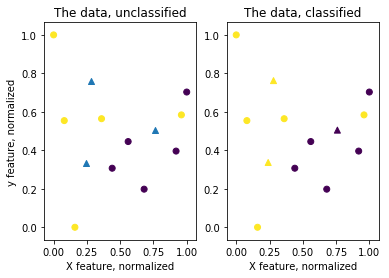

In [154]:
# Here we'll assess the distance of known points from points of interest in order to determine what classes its k
# nearest neighbors belong to

# First we write the function for scaling/normalizing the data:

def min_max_scale(known_array, unknown_array):
    
    minimum_X = min(known_array[:,0])
    maximum_X = max(known_array[:,0])
    minimum_y = min(known_array[:,1])
    maximum_y = max(known_array[:,1])
    
    known_X = [(item - minimum_X)/(maximum_X - minimum_X) for item in known_array[:,0]]
    known_y = [(item - minimum_y)/(maximum_y - minimum_y) for item in known_array[:,1]]
    unknown_X = [(item - minimum_X)/(maximum_X - minimum_X) for item in unknown_array[:,0]]
    unknown_y = [(item - minimum_y)/(maximum_y - minimum_y) for item in unknown_array[:,1]]
    
    return(known_X, known_y, unknown_X, unknown_y)

# This function will determine the distance of an unknown point to a series of known points and return
# the list of those distances:

def find_distances(known_X, known_y, unknown_X, unknown_y):
    
    total_distances = []
    
    for i in range(len(known_X)):
        x_dist = (known_X[i] - unknown_X)**2
        y_dist = (known_y[i] - unknown_y)**2
        total_distances.append((x_dist + y_dist)**0.5)
    
    return(total_distances)

# This function will look at the first k neighbors in a distance-sorted list and return the classification
# that was found most often in that set of neighbors:

def k_neighbors(sorted_distances, k):
    
    zero_counts = 0
    one_counts = 0
    
    for i in range(k):
        if sorted_distances[i][1] == 0:
            zero_counts += 1
        else:
            one_counts += 1
    
    if zero_counts > one_counts:
        return(0)
    else:
        return(1)

# These are the known points:

known_data = np.array([[3.0, 4.1, 0],
                       [2.2, 7.8, 1],
                       [1.3, 12.2, 1],
                       [3.7, 8.0, 1],
                       [2.7, 6.6, 0],
                       [3.8, 9.2, 0],
                       [1.5, 7.7, 1],
                       [3.6, 6.1, 0],
                       [1.7, 2.1, 1],
                       [2.4, 5.2, 0]])

# Here are the points we hope to classify:

unknown_data = np.array([[2.0, 9.8],
                         [1.9, 5.5],
                         [3.2, 7.2]])

# Now we scale/normalize the data:

known_X, known_y, unknown_X, unknown_y = min_max_scale(known_data, unknown_data)

# And extract the labels:

known_labels = known_data[:, 2]

# Let's see what the unclassified data look like relative to the classified data:

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(known_X, known_y, c=known_labels)
ax.scatter(unknown_X, unknown_y, marker='^')
plt.title('The data, unclassified')
plt.xlabel('X feature, normalized')
plt.ylabel('y feature, normalized')

# Now we'll set k and run the distance and nearest neighbor functions to determine which classes were closest:

k = 3
predictions = []

for i in range(len(unknown_X)):
    distances = find_distances(known_X, known_y, unknown_X[i], unknown_y[i])
    labeled_distances = zip(distances, known_labels)
    sorted_distances = sorted(labeled_distances, key=lambda x: x[0])
    predictions.append(k_neighbors(sorted_distances, k))
    
# And we'll see what our classification yielded:

ax2 = fig.add_subplot(122)
ax2.scatter(known_X, known_y, c=known_labels)
ax2.scatter(unknown_X, unknown_y, c=predictions, marker='^')
plt.title('The data, classified')
plt.xlabel('X feature, normalized')
plt.show()
    
# Fucking A!

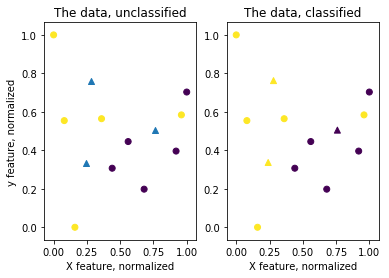

In [172]:
# Now for the sklearn version:

from sklearn.neighbors import KNeighborsClassifier

known_norm_data = np.column_stack((known_X, known_y))
unknown_norm_data = np.column_stack((unknown_X, unknown_y))

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(known_norm_data, known_labels)
prediction = classifier.predict(unknown_norm_data)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(known_X, known_y, c=known_labels)
ax.scatter(unknown_X, unknown_y, marker='^')
plt.title('The data, unclassified')
plt.xlabel('X feature, normalized')
plt.ylabel('y feature, normalized')

ax2 = fig.add_subplot(122)
ax2.scatter(known_X, known_y, c=known_labels)
ax2.scatter(unknown_X, unknown_y, c=prediction, marker='^')
plt.title('The data, classified')
plt.xlabel('X feature, normalized')
plt.show()

# So cool!

## K Nearest Neighbors Regressor
K Nearest Neighbors Regressor is a way of using K nearest neighbors to predict features about your data set.
For instance, if you know have x and y features for your data, you can predict z based on the z's of the k nearest neighbors.

To do this, you take the weighted average of the z values for the neighbors and you assign that to your unknown sample.

Everything about it is essentially the same as the classifier version of the regressor, but rather than class, you use a target.
First, brute force, then scikit

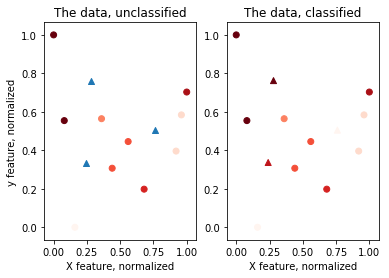

In [184]:
# Just like the classifier, we need information about the distances of points of interest to our known data points

# First we write the function for scaling/normalizing the data:

def min_max_scale(known_array, unknown_array):
    
    minimum_X = min(known_array[:,0])
    maximum_X = max(known_array[:,0])
    minimum_y = min(known_array[:,1])
    maximum_y = max(known_array[:,1])
    
    known_X = [(item - minimum_X)/(maximum_X - minimum_X) for item in known_array[:,0]]
    known_y = [(item - minimum_y)/(maximum_y - minimum_y) for item in known_array[:,1]]
    unknown_X = [(item - minimum_X)/(maximum_X - minimum_X) for item in unknown_array[:,0]]
    unknown_y = [(item - minimum_y)/(maximum_y - minimum_y) for item in unknown_array[:,1]]
    
    return(known_X, known_y, unknown_X, unknown_y)

# This function will determine the distance of an unknown point to a series of known points and return
# the list of those distances:

def find_distances(known_X, known_y, unknown_X, unknown_y):
    
    total_distances = []
    
    for i in range(len(known_X)):
        x_dist = (known_X[i] - unknown_X)**2
        y_dist = (known_y[i] - unknown_y)**2
        total_distances.append((x_dist + y_dist)**0.5)
    
    return(total_distances)

# This function will look at the first k neighbors in a distance-sorted list and return the classification
# that was found most often in that set of neighbors:

def k_neighbors(sorted_distances, k):
    
    numerator = 0
    denominator = 0
    
    for i in range(k):
        numerator += sorted_distances[i][1] / sorted_distances[i][0]
        denominator += 1 / sorted_distances[i][0]
        
    return(numerator/denominator)

# These are the known points:

known_data = np.array([[3.0, 4.1, 7.0],
                       [2.2, 7.8, 5.0],
                       [1.3, 12.2, 9.0],
                       [3.7, 8.0, 3.0],
                       [2.7, 6.6, 6.0],
                       [3.8, 9.2, 8.0],
                       [1.5, 7.7, 9.0],
                       [3.6, 6.1, 3.0],
                       [1.7, 2.1, 2.0],
                       [2.4, 5.2, 6.0]])

# Here are the points we hope to classify:

unknown_data = np.array([[2.0, 9.8],
                         [1.9, 5.5],
                         [3.2, 7.2]])

# Now we scale/normalize the data:

known_X, known_y, unknown_X, unknown_y = min_max_scale(known_data, unknown_data)

targets = known_data[:, 2]

# Let's see what the unclassified data look like relative to the classified data:

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(known_X, known_y, c=targets, cmap='Reds')
ax.scatter(unknown_X, unknown_y, marker='^')
plt.title('The data, unclassified')
plt.xlabel('X feature, normalized')
plt.ylabel('y feature, normalized')

# Now we'll set k and run the distance and nearest neighbor functions to determine which classes were closest:

k = 3
predictions = []

for i in range(len(unknown_X)):
    distances = find_distances(known_X, known_y, unknown_X[i], unknown_y[i])
    labeled_distances = zip(distances, targets)
    sorted_distances = sorted(labeled_distances, key=lambda x: x[0])
    predictions.append(k_neighbors(sorted_distances, k))
    
# And we'll see what our classification yielded:

ax2 = fig.add_subplot(122)
ax2.scatter(known_X, known_y, c=targets, cmap='Reds')
ax2.scatter(unknown_X, unknown_y, c=predictions, cmap='Reds', marker='^')
plt.title('The data, classified')
plt.xlabel('X feature, normalized')
plt.show()

# Rad AF!

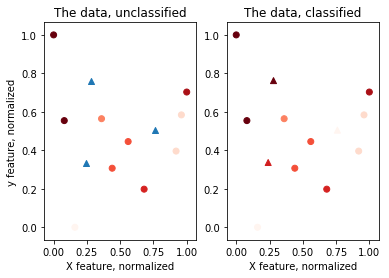

In [185]:
# Now the scikit learn class:

from sklearn.neighbors import KNeighborsRegressor

known_norm_data = np.column_stack((known_X, known_y))
unknown_norm_data = np.column_stack((unknown_X, unknown_y))

model = KNeighborsRegressor(n_neighbors=3)
model.fit(known_norm_data, targets)
predictions = model.predict(unknown_norm_data)

# Let's see the data before classification:

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(known_X, known_y, c=targets, cmap='Reds')
ax.scatter(unknown_X, unknown_y, marker='^')
plt.title('The data, unclassified')
plt.xlabel('X feature, normalized')
plt.ylabel('y feature, normalized')
    
# And we'll see what our classification yielded:

ax2 = fig.add_subplot(122)
ax2.scatter(known_X, known_y, c=targets, cmap='Reds')
ax2.scatter(unknown_X, unknown_y, c=predictions, cmap='Reds', marker='^')
plt.title('The data, classified')
plt.xlabel('X feature, normalized')
plt.show()

# Easy peasy!

## Support Vector Machines
I'll do this one later... This one is hard

# Unsupervised Learning Methods
Unsupervised learning is used when feature data is known but targets are not. For instance, if you want to cluster data in order to classify it without knowing what the classes necessarily are.
Unlike supervised methods, the number of clusters you choose to generate can lead to very different results.

## K Means and K Means++ Clustering
K Means is an iterative clustering method that starts by placing k random cluster centroids among your points in Nth-dimensional space. 

You then measure the distance of each point to these centroids and determine which centroid is closest to each point. This temporarily becomes the "cluster class" for that point.

You then take the mean coordinates of every clustered point and use this coordinate as the new centroid coordinate.
The process is repeated again until the centroids don't change between iterations.

I won't do the brute force version of K Means++, since it applies the same principles as K Means, but instead of using random coordinates to begin the centroid determination process, it uses an existing point (so as to always guarantee that your centroids will find reasonable locations among your data).

Scikit-learn uses K Means++ as a default, so we don't have to worry about specifying it.

First the brute force, then the scikit

In [10]:
# For simplicitiy's sake, we'll start with a numpy array of normalized data for plotting.
# We'll load it once and do all of our manipulations in a separate panel so we don't regenerate the
# dataset every time we change something. np.random.random generates floats that fall in [0, 1)

data = np.random.random((100, 2))

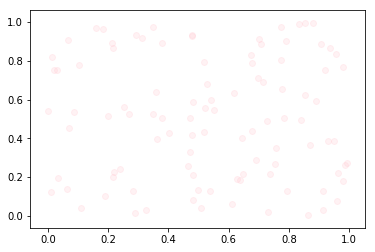

In [64]:
# Now we'll plot the data to see what it looks like in space:

plt.scatter(data[:,0], data[:,1], c='pink', alpha=0.2)
plt.show()

In [70]:
# Ok, so our data are distributed in some way that is "random" dependent. The dataset I'm looking at while
# I write this appears (visually) to maybe have 4 clusters, so I'm going to write the example code for that

k = 4

# We have to generate 4 random starting centroid coordinates:

centroids = np.array([list(np.random.random(2)) for i in range(k)])

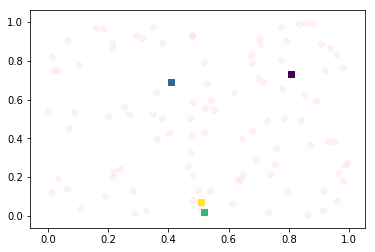

In [71]:
# Now we place the centroids amongst our data:
plt.scatter(data[:,0], data[:,1], c='pink', alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], c=range(k), marker='s')
plt.show()

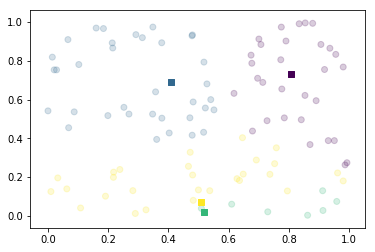

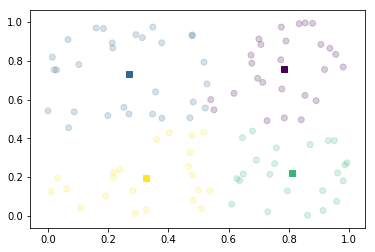

In [72]:
# Awesome. So now we're going to calculate the distances of every point to every centroids and assign
# Each point to the nearest centroid:

def smallest_distance_to_centroid(point, centroids):
   
    point_x = point[0]
    point_y = point[1]    
    distances = []
    
    for i in range(len(centroids)):
        
        x_dist = (point_x - centroids[i][0])**2
        y_dist = (point_y - centroids[i][1])**2
        
        distances.append((x_dist + y_dist)**0.5)
    
    return(distances.index(min(distances)))

def recalculate_centroids(points):
    
    new_means = []
    
    for i in range(k):
        
        cluster_data = points[np.where(points[:,2] == i)]
        x_mean = cluster_data[:,0].mean()
        y_mean = cluster_data[:,1].mean()
        new_means.append([x_mean, y_mean])
    
    return(np.array(new_means))

# First, we'll plot what clusters and centroids look like to begin with:

clusters = [smallest_distance_to_centroid(data[i], centroids) for i in range(len(data))]

plt.scatter(data[:,0], data[:,1], c=clusters, alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], c=range(k), marker='s')
plt.title('Starting clusters')
plt.show()

# Here's the magic: We're now going to iterate until the centroid coordinates reach a stable set of values
# That is to say, they don't change between iterations because they've found the mean spot for their cluster.
# This while loop is a little terrifying cause it has no external check... A for loop with max of 1000 may be better.
# Do as I say, not as I do:

while True:
       
    clusters = [smallest_distance_to_centroid(data[i], centroids) for i in range(len(data))]
    new_data = np.column_stack((data[:,0:2], clusters))

    new_centroids = recalculate_centroids(new_data)
    
    if np.array_equal(new_centroids, centroids):
        break
    else:
        centroids = new_centroids
        
plt.scatter(new_data[:,0], new_data[:,1], c=new_data[:,2], alpha=0.2)
plt.scatter(new_centroids[:,0], new_centroids[:,1], c=range(k), marker='s')
plt.title('Ending clusters')
plt.show()

# Boss!

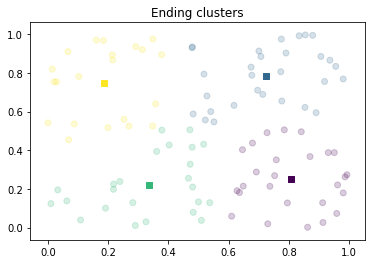

In [76]:
# Now the scikit version (possibly the simplest that we've done so far):

from sklearn.cluster import KMeans

model = KMeans(n_clusters=k)
model.fit(data)
labels = model.labels_
cluster_centers = model.cluster_centers_

plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.2)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=range(k), marker='s')
plt.title('Ending clusters')
plt.show()

# Yeah, boiii!